In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
from keras.models import load_model
import pandas_ta as ta
from plotly.subplots import make_subplots

In [3]:
ticker = "^IXIC"

data = yf.download(ticker, start='2016-01-01', end='2023-10-31')

[*********************100%%**********************]  1 of 1 completed


In [183]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,4897.649902,4903.089844,4846.979980,4903.089844,4903.089844,2218420000
2016-01-05,4917.839844,4926.729980,4872.740234,4891.430176,4891.430176,1927380000
2016-01-06,4813.759766,4866.040039,4804.689941,4835.759766,4835.759766,2168620000
2016-01-07,4736.399902,4788.020020,4688.169922,4689.430176,4689.430176,2552590000
2016-01-08,4722.020020,4742.569824,4637.850098,4643.629883,4643.629883,2288750000
2016-01-11,4673.439941,4683.020020,4573.779785,4637.990234,4637.990234,2391110000
2016-01-12,4681.540039,4714.799805,4618.029785,4685.919922,4685.919922,2147470000
2016-01-13,4706.020020,4713.979980,4517.560059,4526.060059,4526.060059,2533200000
2016-01-14,4545.370117,4650.549805,4470.589844,4615.000000,4615.000000,2565560000


In [7]:
fig = go.Figure(data = [go.Candlestick(x = data.index,
                                       open = data['Open'],
                                       high=data['High'],
                                       low=data['Low'],
                                       close=data['Close'])])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)
fig.show()

In [9]:
def bollinger_bands(df, n, m):
    
    TP = (df['High'] + df['Low'] + df['Close']) / 3

    data = TP
    
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [10]:
bol = bollinger_bands(data, 20, 2)
print(bol)

                    Open          High           Low         Close  \
Date                                                                 
2016-01-04   4897.649902   4903.089844   4846.979980   4903.089844   
2016-01-05   4917.839844   4926.729980   4872.740234   4891.430176   
2016-01-06   4813.759766   4866.040039   4804.689941   4835.759766   
2016-01-07   4736.399902   4788.020020   4688.169922   4689.430176   
2016-01-08   4722.020020   4742.569824   4637.850098   4643.629883   
...                  ...           ...           ...           ...   
2023-10-24  13084.990234  13170.389648  13022.849609  13139.870117   
2023-10-25  13039.860352  13042.519531  12804.299805  12821.219727   
2023-10-26  12768.969727  12818.139648  12543.860352  12595.610352   
2023-10-27  12718.690430  12772.429688  12600.570312  12643.009766   
2023-10-30  12750.469727  12842.959961  12691.559570  12789.480469   

               Adj Close      Volume          B_MA            BU            BL  
Date    

In [187]:
print(bol['BU'])

Date
2016-01-04             NaN
2016-01-05             NaN
2016-01-06             NaN
2016-01-07             NaN
2016-01-08             NaN
                  ...     
2023-10-24    13697.563024
2023-10-25    13718.543558
2023-10-26    13779.649857
2023-10-27    13816.394099
2023-10-30    13826.286214
Name: BU, Length: 1970, dtype: float64


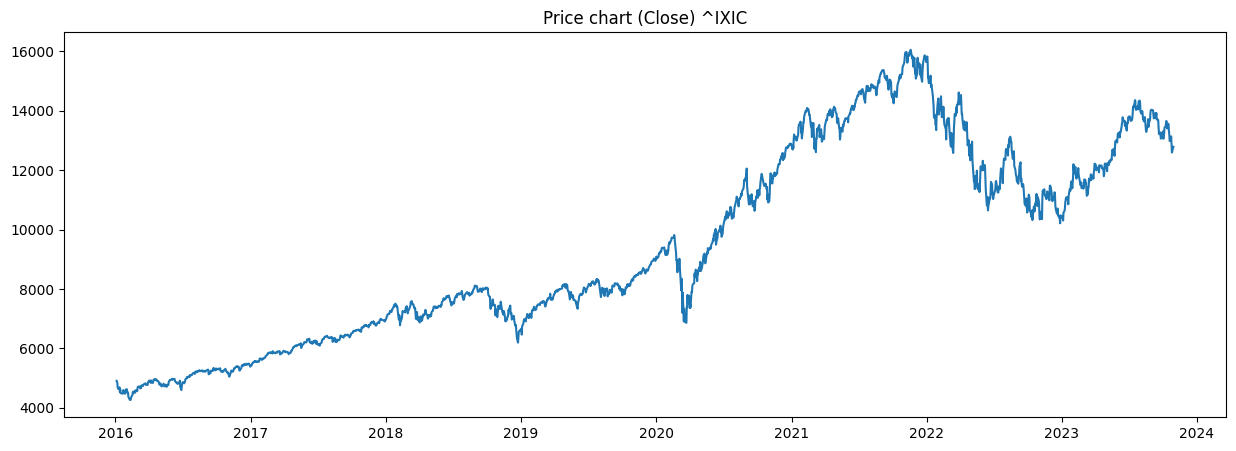

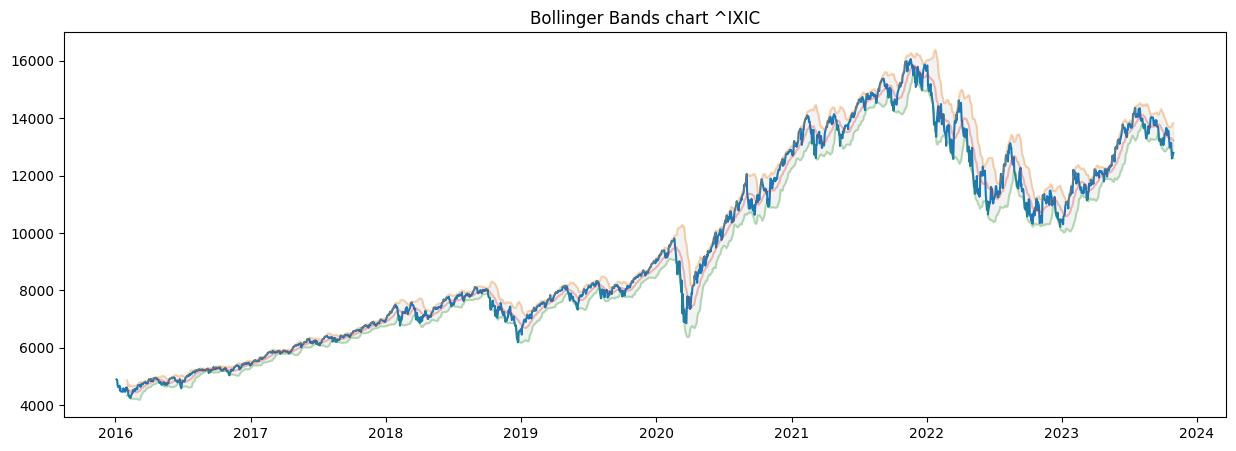

In [12]:
plt.figure(figsize=(15,5))
plt.plot(bol.index, bol['Close'])
plt.title('Price chart (Close) ' + str(ticker))
plt.show()

plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ' + str(ticker))
plt.plot(bol.index, bol['Close'])
plt.plot(bol.index, bol['BU'], alpha=0.3)
plt.plot(bol.index, bol['BL'], alpha=0.3)
plt.plot(bol.index, bol['B_MA'], alpha=0.3)
plt.fill_between(bol.index, bol['BU'], bol['BL'], color='grey', alpha=0.1)
plt.show()

In [189]:
data.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
pd.set_option("display.max_columns", None)
print(data)

                    Open          High           Low         Close  \
Date                                                                 
2016-01-04   4897.649902   4903.089844   4846.979980   4903.089844   
2016-01-05   4917.839844   4926.729980   4872.740234   4891.430176   
2016-01-06   4813.759766   4866.040039   4804.689941   4835.759766   
2016-01-07   4736.399902   4788.020020   4688.169922   4689.430176   
2016-01-08   4722.020020   4742.569824   4637.850098   4643.629883   
...                  ...           ...           ...           ...   
2023-10-24  13084.990234  13170.389648  13022.849609  13139.870117   
2023-10-25  13039.860352  13042.519531  12804.299805  12821.219727   
2023-10-26  12768.969727  12818.139648  12543.860352  12595.610352   
2023-10-27  12718.690430  12772.429688  12600.570312  12643.009766   
2023-10-30  12750.469727  12842.959961  12691.559570  12789.480469   

               Adj Close      Volume  MACD_12_26_9  MACDh_12_26_9  \
Date                

In [190]:
fig = make_subplots(rows=2, cols=1)

fig.append_trace(
    go.Scatter(
        x=data.index,
        y=data['Open'],
        line=dict(color='#ff9900', width=1),
        name='Open',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=data.index,
        y=data['MACD_12_26_9'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        legendgroup='2',
    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=data.index,
        y=data['MACDs_12_26_9'],
        line=dict(color='#000000', width=2),
        legendgroup='2',
        name='signal'
    ), row=2, col=1
)

colors = np.where(data['MACDh_12_26_9'] < 0, '#000', '#ff9900')
fig.append_trace(
    go.Bar(
        x=data.index,
        y=data['MACDh_12_26_9'],
        name='histogram',
        marker_color=colors,
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

fig.update_layout(layout)
fig.show()

In [191]:
close_prices = data['Close']

values = close_prices.values

training_data_len = math.ceil(len(values) * 0.8)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values.reshape(-1, 1))

train_data = scaled_data[0: training_data_len, :]
test_data = scaled_data[training_data_len - 60: , : ]

x_train, y_train = [], []
x_test = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60: i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = values[training_data_len:]

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1516, 60, 1)
y_train shape: (1516,)
x_test shape: (394, 60, 1)
y_test shape: (394,)


In [192]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(200, return_sequences=False))
model.add(layers.Dense(45))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_17 (LSTM)              (None, 200)               240800    
                                                                 
 dense_16 (Dense)            (None, 45)                9045      
                                                                 
 dense_17 (Dense)            (None, 1)                 46        
                                                                 
Total params: 290691 (1.11 MB)
Trainable params: 290691 (1.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x_train, y_train, batch_size= 1, epochs=10)

Epoch 1/10
1516/1516 [==============================] - 89s 54ms/step - loss: 0.0022 - mean_absolute_error: 0.0276
Epoch 2/10
1516/1516 [==============================] - 81s 54ms/step - loss: 0.0010 - mean_absolute_error: 0.0215
Epoch 3/10
1516/1516 [==============================] - 81s 54ms/step - loss: 5.3979e-04 - mean_absolute_error: 0.0164
Epoch 4/10
1516/1516 [==============================] - 81s 54ms/step - loss: 5.5453e-04 - mean_absolute_error: 0.0164
Epoch 5/10
1516/1516 [==============================] - 82s 54ms/step - loss: 4.7247e-04 - mean_absolute_error: 0.0150
Epoch 6/10
1516/1516 [==============================] - 83s 55ms/step - loss: 4.3693e-04 - mean_absolute_error: 0.0149
Epoch 7/10
1516/1516 [==============================] - 81s 53ms/step - loss: 3.8159e-04 - mean_absolute_error: 0.0140
Epoch 8/10
1516/1516 [==============================] - 81s 53ms/step - loss: 4.9957e-04 - mean_absolute_error: 0.0154
Epoch 9/10
1516/1516 [==============================] - 

In [194]:
model.save(r"C:\CODE\Clg\Sem_5_MP\model_saves")
print("Model Saved")

INFO:tensorflow:Assets written to: C:\CODE\Clg\Sem_5_MP\model_saves\assets


INFO:tensorflow:Assets written to: C:\CODE\Clg\Sem_5_MP\model_saves\assets


Model Saved


In [195]:
model = load_model(r"C:\CODE\Clg\Sem_5_MP\model_saves")

In [196]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root mean squared error:', rmse)

13/13 [==============================] - 1s 53ms/step
Root mean squared error: 100.18344999206853


In [197]:
data = data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
train.reset_index(inplace = True)
validation.reset_index(inplace = True)

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.Date, y=train.Close, mode='lines', name='Actual Price (train)'))
fig.add_trace(go.Scatter(x=validation.Date, y=validation.Close, mode='lines', name='Actual Price (test)'))
fig.add_trace(go.Scatter(x=validation.Date, y=validation.Predictions, mode='lines', name='Predicted price'))
fig.update_layout(
        title="Time series Forecasting using LSTM",
        xaxis_title="Date-Time",
        yaxis_title="Values",
        legend_title="Legend")
fig.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_29592\4067801244.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\CODE\Clg\Sem_5_MP\venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

